In [1]:
using Pkg
Pkg.add("StatsBase")
Pkg.add("Recommendation")


   Updating registry at `C:\Users\megha\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\megha\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\megha\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\megha\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\megha\.julia\environments\v1.5\Manifest.toml`


In [2]:
using DataFrames
using CSV
temp=CSV.read("books.csv")

,isbn13,isbn10,title,subtitle
,Int64,String,String,String?
1,9780002005883,0002005883,Gilead,missing
2,9780002261982,0002261987,Spider's Web,A Novel
3,9780006163831,0006163831,The One Tree,missing
4,9780006178736,0006178731,Rage of angels,missing
5,9780006280897,0006280897,The Four Loves,missing
6,9780006280934,0006280935,The Problem of Pain,missing
7,9780006353287,0006353282,An Autobiography,missing
8,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders
9,9780006470229,000647022X,The Gap Into Madness,Chaos and Order


In [3]:
DataFrames.head(temp)

,isbn13,isbn10,title,subtitle,authors
,Int64,String,String,String?,String?
1,9780002005883,0002005883,Gilead,missing,Marilynne Robinson
2,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie
3,9780006163831,0006163831,The One Tree,missing,Stephen R. Donaldson
4,9780006178736,0006178731,Rage of angels,missing,Sidney Sheldon
5,9780006280897,0006280897,The Four Loves,missing,Clive Staples Lewis
6,9780006280934,0006280935,The Problem of Pain,missing,Clive Staples Lewis


In [4]:
nrow(temp) #number of rows

6810

In [5]:
ncol(temp) #number of columns

12

In [6]:
names(temp) #column names

12-element Array{String,1}:
 "isbn13"
 "isbn10"
 "title"
 "subtitle"
 "authors"
 "categories"
 "thumbnail"
 "description"
 "published_year"
 "average_rating"
 "num_pages"
 "ratings_count"

In [7]:
books=select(temp, Not([:subtitle]))

,isbn13,isbn10,title,authors
,Int64,String,String,String?
1,9780002005883,0002005883,Gilead,Marilynne Robinson
2,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie
3,9780006163831,0006163831,The One Tree,Stephen R. Donaldson
4,9780006178736,0006178731,Rage of angels,Sidney Sheldon
5,9780006280897,0006280897,The Four Loves,Clive Staples Lewis
6,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis
7,9780006353287,0006353282,An Autobiography,Agatha Christie
8,9780006380832,0006380832,Empires of the Monsoon,Richard Hall
9,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson


In [8]:
using Statistics
describe(books)

,variable,mean,min
,Symbol,Union…,Any
1,isbn13,9.78068e12,9780002005883
2,isbn10,,0002005883
3,title,,"""A"" is for Abductive"
4,authors,,A. Hatto
5,categories,,87th Precinct (Imaginary place)
6,thumbnail,,http://books.google.com/books/content?id=--_eXhJE0noC&printsec=frontcover&img=1&zoom=1&source=gbs_api
7,description,,""" Michener is America's best writer, and he proves it once again in CENTENNIAL."" THE PITTSBURGH PRESSA stunning panorama of the West, CENTENNIAL is an enthralling celebration of our country, brimming with the glory and the greatness of the American past that only bestselling author James Michener could bring to stunning life. From the Native Americans, the migrating white men and women, the cowboys, and the foreigners, it is a story of trappers, traders, homesteaders, gold seekers, ranchers, and hunters--all caught up in the dramatic events and violent conflicts that shaped the destiny of our legendary West."
8,published_year,1998.63,1853
9,average_rating,3.93328,0.0


In [9]:
using Statistics
mean(books[:average_rating])

missing

In [10]:

for i in 1:nrow(books)
    if ismissing(books[:average_rating][i])
        books[:average_rating][i]=0.0
    end
end
books[:average_rating]

6810-element Array{Union{Missing, Float64},1}:
 3.85
 3.83
 3.97
 3.93
 4.15
 4.09
 4.27
 4.41
 4.15
 4.11
 4.04
 4.15
 4.03
 ⋮
 0.0
 3.22
 3.26
 3.83
 2.93
 3.7
 3.82
 4.51
 4.08
 3.98
 0.0
 3.7

In [11]:
mean(books[:average_rating])

3.9084478707782666

In [12]:
mean(books[:ratings_count])

missing

In [13]:

for i in 1:nrow(books)
    if ismissing(books[:ratings_count][i])
        books[:ratings_count][i]=0.0
    end
end
books[:ratings_count]

6810-element Array{Union{Missing, Int64},1}:
    361
   5164
    172
  29532
  33684
  37569
   3975
     65
    103
  43540
  49170
 133972
   2966
      ⋮
      0
    134
     21
     10
      0
     24
   1568
    104
    324
   5733
      0
     10

In [14]:
mean(books[:ratings_count])

20936.064464023493

In [15]:
using StatsBase
category=countmap(skipmissing(books[:categories]))

Dict{String,Int64} with 567 entries:
  "Christmas stories"                                  => 2
  "Apartheid"                                          => 1
  "Short stories, American"                            => 2
  "Bible"                                              => 5
  "Alzheimer's disease"                                => 1
  "People with social disabilities"                    => 1
  "Blacks"                                             => 1
  "Animals, Treatment of"                              => 1
  "Study Aids"                                         => 5
  "Canterbury (England)"                               => 1
  "Poirot, Hercule (Fictitious character)"             => 1
  "Democracy"                                          => 1
  "Vice-Presidents"                                    => 1
  "Humorous stories, American"                         => 1
  "Antiques & Collectibles"                            => 3
  "Comic books, strips, etc"                           => 4
  "

In [16]:
category_sorted=sort!(collect(values(category)))

567-element Array{Int64,1}:
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    1
    ⋮
   71
   79
  116
  132
  137
  159
  160
  166
  264
  401
  538
 2588

In [17]:
final_values=category_sorted[558:567]

10-element Array{Int64,1}:
  116
  132
  137
  159
  160
  166
  264
  401
  538
 2588

In [18]:
final_keys=[]
for i in final_values
    for (key,value) in category
        if value==i
            push!(final_keys,key)
            break
        end
    end
end
final_keys

10-element Array{Any,1}:
 "Juvenile Nonfiction"
 "Drama"
 "Religion"
 "Comics & Graphic Novels"
 "Philosophy"
 "Literary Criticism"
 "History"
 "Biography & Autobiography"
 "Juvenile Fiction"
 "Fiction"

In [19]:
final_category_values=reverse(final_values)

10-element Array{Int64,1}:
 2588
  538
  401
  264
  166
  160
  159
  137
  132
  116

In [20]:
final_category_keys=reverse(final_keys)

10-element Array{Any,1}:
 "Fiction"
 "Juvenile Fiction"
 "Biography & Autobiography"
 "History"
 "Literary Criticism"
 "Philosophy"
 "Comics & Graphic Novels"
 "Religion"
 "Drama"
 "Juvenile Nonfiction"

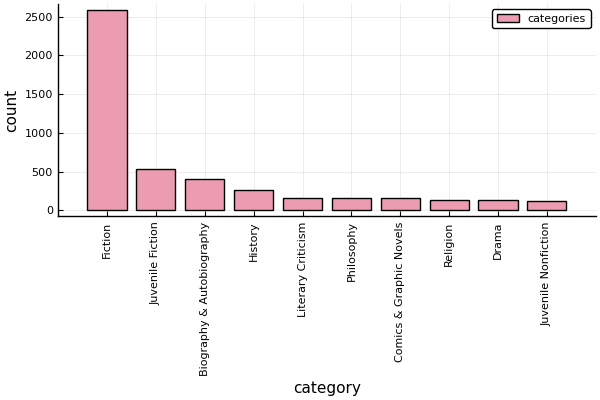

In [21]:
using PyPlot
using StatsPlots
pyplot()
StatsPlots.bar(final_category_keys,final_category_values,xlabel="category",xrotation=90,ylabel="count",labels="categories",color="#EB9CB0")

In [22]:
#inserting new column in data frame books
cat_id_values=[]
for i in 1:nrow(books)
    push!(cat_id_values,0)
end
insert!(books, 3, cat_id_values , :cat_id)

,isbn13,isbn10,cat_id,title
,Int64,String,Any,String
1,9780002005883,0002005883,0,Gilead
2,9780002261982,0002261987,0,Spider's Web
3,9780006163831,0006163831,0,The One Tree
4,9780006178736,0006178731,0,Rage of angels
5,9780006280897,0006280897,0,The Four Loves
6,9780006280934,0006280935,0,The Problem of Pain
7,9780006353287,0006353282,0,An Autobiography
8,9780006380832,0006380832,0,Empires of the Monsoon
9,9780006470229,000647022X,0,The Gap Into Madness


In [23]:
books.cat_id= convert(Array{Int64,1},books.cat_id)
books

,isbn13,isbn10,cat_id,title
,Int64,String,Int64,String
1,9780002005883,0002005883,0,Gilead
2,9780002261982,0002261987,0,Spider's Web
3,9780006163831,0006163831,0,The One Tree
4,9780006178736,0006178731,0,Rage of angels
5,9780006280897,0006280897,0,The Four Loves
6,9780006280934,0006280935,0,The Problem of Pain
7,9780006353287,0006353282,0,An Autobiography
8,9780006380832,0006380832,0,Empires of the Monsoon
9,9780006470229,000647022X,0,The Gap Into Madness


In [24]:
for i in 1:nrow(books)
    if ismissing(books[:categories][i])
        continue
    end
    for x in 1:length(final_category_keys)
        #println(x," ",books[:categories][i]," ",final_category_keys[x])
        if books[:categories][i] == final_category_keys[x]
            books[:cat_id][i]=x
            break
        end
    end
end

In [25]:
books[:cat_id][1234]

5

In [26]:
books[:categories][1234]

"Literary Criticism"

In [27]:
CSV.write("cat_ids",books)

"cat_ids"

In [28]:
selected_categories=DataFrame(ISBN=String[],cat_id=Int[],title=String[],category=String[],Rating=Float64[])

,ISBN,cat_id,title,category,Rating
,String,Int64,String,String,Float64


In [29]:
for row in eachrow(books)
    if ismissing(row[:categories])
        continue
    end
    if row[:categories] in final_category_keys
        push!(selected_categories,convert(Array,row[[:isbn10,:cat_id,:title,:categories,:average_rating]]))
        
    end
        
end

In [30]:
CSV.write("selected_categories",selected_categories)

"selected_categories"

In [31]:
selected_categories

,ISBN,cat_id,title,category
,String,Int64,String,String
1,0002005883,1,Gilead,Fiction
2,0006178731,1,Rage of angels,Fiction
3,0006482074,1,Warhost of Vastmark,Fiction
4,000664600X,2,Ocean Star Express,Juvenile Fiction
5,000690601X,2,The Princess of the Chalet School,Juvenile Fiction
6,0007121016,1,Taken at the Flood,Fiction
7,000712774X,1,The illustrated man,Fiction
8,0007149824,1,The Yiddish Policemen's Union,Fiction
9,000715805X,3,The Real Trial of Oscar Wilde,Biography & Autobiography


In [32]:
using Recommendation

In [33]:
cat_mapping, book_mapping =Dict{Int,Int}(),Dict{String,Int}()

(Dict{Int64,Int64}(), Dict{String,Int64}())

In [34]:
cat_counter=0
book_counter=0

0

In [35]:
events = Recommendation.Event[]

Event[]

In [36]:
for row in eachrow(selected_categories)
    global cat_counter, book_counter
    global cat_id, book_id, rating = row[:cat_id],row[:ISBN], row[:Rating] 
    haskey(cat_mapping, cat_id) || (cat_mapping[cat_id] = (cat_counter += 1)) 
    haskey(book_mapping, book_id) || (book_mapping[book_id] =(book_counter += 1)) 
    push!(events, Recommendation.Event(cat_mapping[cat_id],book_mapping[book_id], rating)) 
end

In [37]:
events #combination of cat_id,ISBN and Rating

4661-element Array{Event,1}:
 Event(1, 1, 3.85)
 Event(1, 2, 3.93)
 Event(1, 3, 4.03)
 Event(2, 4, 3.5)
 Event(2, 5, 4.1)
 Event(1, 6, 3.71)
 Event(1, 7, 4.14)
 Event(1, 8, 3.7)
 Event(3, 9, 4.04)
 Event(1, 10, 3.91)
 Event(1, 11, 3.69)
 Event(1, 12, 3.65)
 Event(1, 13, 4.02)
 ⋮
 Event(1, 4650, 3.7)
 Event(1, 4651, 3.79)
 Event(1, 4652, 3.92)
 Event(1, 4653, 3.77)
 Event(7, 4654, 4.06)
 Event(4, 4655, 4.08)
 Event(1, 4656, 3.75)
 Event(2, 4657, 0.0)
 Event(1, 4658, 3.22)
 Event(4, 4659, 4.51)
 Event(5, 4660, 0.0)
 Event(6, 4661, 3.7)

In [38]:
da= DataAccessor(events, cat_counter, book_counter)

DataAccessor(Event[Event(1, 1, 3.85), Event(1, 2, 3.93), Event(1, 3, 4.03), Event(2, 4, 3.5), Event(2, 5, 4.1), Event(1, 6, 3.71), Event(1, 7, 4.14), Event(1, 8, 3.7), Event(3, 9, 4.04), Event(1, 10, 3.91)  …  Event(1, 4652, 3.92), Event(1, 4653, 3.77), Event(7, 4654, 4.06), Event(4, 4655, 4.08), Event(1, 4656, 3.75), Event(2, 4657, 0.0), Event(1, 4658, 3.22), Event(4, 4659, 4.51), Event(5, 4660, 0.0), Event(6, 4661, 3.7)], [3.85 3.93 … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN], Dict{Int64,Any}(), Dict{Int64,Any}())

In [39]:
#The Recommendation package uses Stochastic Gradient Descent to perform matrix factorization
recommender=Recommendation.MF(da)  #matrix factorisation is performed

MF(DataAccessor(Event[Event(1, 1, 3.85), Event(1, 2, 3.93), Event(1, 3, 4.03), Event(2, 4, 3.5), Event(2, 5, 4.1), Event(1, 6, 3.71), Event(1, 7, 4.14), Event(1, 8, 3.7), Event(3, 9, 4.04), Event(1, 10, 3.91)  …  Event(1, 4652, 3.92), Event(1, 4653, 3.77), Event(7, 4654, 4.06), Event(4, 4655, 4.08), Event(1, 4656, 3.75), Event(2, 4657, 0.0), Event(1, 4658, 3.22), Event(4, 4659, 4.51), Event(5, 4660, 0.0), Event(6, 4661, 3.7)], [3.85 3.93 … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN], Dict{Int64,Any}(), Dict{Int64,Any}()), 20, Union{Nothing, Float64}[nothing nothing … nothing nothing; nothing nothing … nothing nothing; … ; nothing nothing … nothing nothing; nothing nothing … nothing nothing], Union{Nothing, Float64}[nothing nothing … nothing nothing; nothing nothing … nothing nothing; … ; nothing nothing … nothing nothing; nothing nothing … nothing nothing])

In [40]:
Recommendation.build!(recommender)

93220-element Array{Float64,1}:
 0.11065524386971085
 0.112955661790202
 0.1158241489825679
 0.11067902911293533
 0.12965027745994043
 0.10663123314099983
 0.11898533221225141
 0.10634455960759889
 0.1312332047299295
 0.11237931874354157
 0.10604450632808839
 0.1049025076264029
 0.11554765356265324
 ⋮
 0.10633856456301463
 0.10892937961676254
 0.11266368804478238
 0.10835290899785409
 0.15858559991029306
 0.15059073419671162
 0.10777428809618014
 3.4240845257000482e-6
 0.09254925720325427
 0.1664544343394129
 2.968787154480081e-5
 0.1381052494786308

In [41]:
#book_mapping contains mapping of original id to recommender id
#we need to reverswe the key value pair 
function value_to_key(d)
    Dict(value=> key for (key,value) in d)
end

value_to_key (generic function with 1 method)

In [42]:
#we are converting recommendations to an array of ISBNs
function recommend_to_vector(recommendations)
    [value_to_key(book_mapping)[r[1]] for r in recommendations]
end

recommend_to_vector (generic function with 1 method)

In [43]:
recommend_to_vector(recommend(recommender,1,10,[1:book_counter...])) #these are the ISBNs of 20 recommended books

10-element Array{String,1}:
 "0739844326"
 "0851621813"
 "0310249872"
 "0567044718"
 "094180755X"
 "0199267170"
 "0141000589"
 "0740748475"
 "0395754909"
 "0736911685"

In [44]:
for i in recommend_to_vector(recommend(recommender, 1, 10,[1:book_counter...]))
    println(selected_categories[selected_categories.ISBN .== i, :title]," ",selected_categories[selected_categories.ISBN .== i, :category]," ",selected_categories[selected_categories.ISBN .== i,:Rating])
end

["Bill Gates"] ["Juvenile Nonfiction"] [5.0]
["The Complete Theory Fun Factory"] ["Juvenile Nonfiction"] [5.0]
["Fanning the Flame"] ["Religion"] [5.0]
["Colossians and Philemon"] ["Religion"] [5.0]
["The Little Big Book for God's Children"] ["Religion"] [4.88]
["William Shakespeare: The Complete Works"] ["Drama"] [4.62]
["Sammlung"] ["Drama"] [4.59]
["The Complete Calvin and Hobbes"] ["Comics & Graphic Novels"] [4.82]
["The Riverside Shakespeare"] ["Drama"] [4.55]
["A Wife After God's Own Heart Growth and Study Guide"] ["Religion"] [4.75]
